 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [13]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [14]:
# Paths for all datasets
whale_returns = Path.cwd()/"Resources"/"whale_returns.csv"
algo_returns = Path.cwd()/"Resources"/"algo_returns.csv"
sp500_history = Path.cwd()/"Resources"/"sp500_history.csv"
# Reading whale returns
whale_returns_df = pd.read_csv(whale_returns)

In [15]:
# Count nulls
whale_returns_df.isnull().sum()

Date                           0
SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [16]:
# Drop nulls
whale_returns_df.dropna(inplace=True)
print(whale_returns_df)
whale_returns_df.isnull().sum()

            Date  SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
1     2015-03-03                  -0.001266           -0.004981   
2     2015-03-04                   0.002230            0.003241   
3     2015-03-05                   0.004016            0.004076   
4     2015-03-06                  -0.007905           -0.003574   
5     2015-03-09                   0.000582            0.004225   
...          ...                        ...                 ...   
1055  2019-04-25                  -0.000285           -0.001291   
1056  2019-04-26                   0.008149            0.009162   
1057  2019-04-29                   0.001254            0.002719   
1058  2019-04-30                  -0.001295           -0.002211   
1059  2019-05-01                  -0.005847           -0.001341   

      TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC  
1                       -0.000496               -0.006569  
2                       -0.002534                0.004213  
3              

Date                           0
SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [17]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv(algo_returns)

In [18]:
# Count nulls
algo_returns_df.isnull().sum()

Date      0
Algo 1    0
Algo 2    6
dtype: int64

In [19]:
# Drop nulls
algo_returns_df.dropna(inplace=True)
print(algo_returns_df)
algo_returns_df.isnull().sum()

            Date    Algo 1    Algo 2
6     2014-06-05  0.004062  0.013285
7     2014-06-06  0.001857  0.008284
8     2014-06-09 -0.005012  0.005668
9     2014-06-10  0.004406 -0.000735
10    2014-06-11  0.004760 -0.003761
...          ...       ...       ...
1236  2019-04-25  0.000682 -0.007247
1237  2019-04-26  0.002981  0.005256
1238  2019-04-29  0.005208  0.002829
1239  2019-04-30 -0.002944 -0.001570
1240  2019-05-01  0.000094 -0.007358

[1235 rows x 3 columns]


Date      0
Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [20]:
# Reading S&P 500 Closing Prices
sp_returns_df = pd.read_csv(sp500_history)
sp_returns_df.head()

,Date,Close
0,23-Apr-19,$2933.68
1,22-Apr-19,$2907.97
2,18-Apr-19,$2905.03
3,17-Apr-19,$2900.45
4,16-Apr-19,$2907.06


In [21]:
# Check Data Types
sp_returns_df.dtypes


Date     object
Close    object
dtype: object

In [22]:
# Fix Data Types
# Replace instances of $ with a blank space
sp_returns_df['Close']=sp_returns_df['Close'].str.replace('$','')
sp_returns_df.head()

# Cast the "Close" column values as float
sp_returns_df['Close']=sp_returns_df['Close'].astype('float')
sp_returns_df.head()


<ipython-input-22-0d7076c22be4>:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  sp_returns_df['Close']=sp_returns_df['Close'].str.replace('$','')


,Date,Close
0,23-Apr-19,2933.68
1,22-Apr-19,2907.97
2,18-Apr-19,2905.03
3,17-Apr-19,2900.45
4,16-Apr-19,2907.06


In [23]:
# Cast the "Close" column values as float
sp_returns_df['Close']=sp_returns_df['Close'].astype('float')
sp_returns_df.head()
sp_returns_df['Close'].dtype

dtype('float64')

In [24]:

# Change the index to a Date Index
sp_returns_df.set_index(pd.to_datetime(sp_returns_df['Date'],infer_datetime_format=True),inplace=True)
sp_returns_df.head()

,Date,Close
Date,,
2019-04-23,23-Apr-19,2933.68
2019-04-22,22-Apr-19,2907.97
2019-04-18,18-Apr-19,2905.03
2019-04-17,17-Apr-19,2900.45
2019-04-16,16-Apr-19,2907.06


In [25]:
sp_returns_df.drop(columns=['Date'],inplace=True)

In [26]:
# Calculate Daily Returns. Note: Since we didn't drop the Date column, we have to specify the column for Panda to calculate the % change, if not, we will get an error stating we can't complete the operation on a string (date is a string)
sp_daily=sp_returns_df.pct_change()
sp_daily.head()


,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [27]:
# Drop nulls
sp_daily.dropna(inplace=True)
sp_daily.isnull().sum()
sp_daily.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [28]:
# Rename `Close` Column to be specific to this portfolio.
sp_daily.rename(columns={"Close":"SP500"},inplace=True)

In [29]:
type(sp_daily)

pandas.core.frame.DataFrame

In [30]:
# Create Date Index for Whale Returns
whale_returns_df.set_index(pd.to_datetime(whale_returns_df['Date'],infer_datetime_format=True),inplace=True)
whale_returns_df.head()

,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,,
2015-03-03,2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [31]:
# Create Date Index for Algorithmic Returns 

algo_returns_df.set_index(pd.to_datetime(algo_returns_df['Date'],infer_datetime_format=True),inplace=True)
algo_returns_df.head()

,Date,Algo 1,Algo 2
Date,,,
2014-06-05,2014-06-05,0.004062,0.013285
2014-06-06,2014-06-06,0.001857,0.008284
2014-06-09,2014-06-09,-0.005012,0.005668
2014-06-10,2014-06-10,0.004406,-0.000735
2014-06-11,2014-06-11,0.004760,-0.003761


## Combine Whale, Algorithmic, and S&P 500 Returns

In [76]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
# Inner joins are done based on a common denominator across datasets, in this case, it is the "DATE" column
combined_returns=pd.concat([sp_daily,whale_returns_df,algo_returns_df],axis='columns',join='inner')
combined_returns.head()


,SP500,Date,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Date,Algo 1,Algo 2
Date,,,,,,,,,
2019-04-22,-0.008764,2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,2019-04-22,0.000677,-0.001936
2019-04-18,-0.001011,2019-04-18,0.001448,0.001222,0.000582,0.001916,2019-04-18,-0.000588,-0.001229
2019-04-17,-0.001577,2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,2019-04-17,-0.010301,-0.005228
2019-04-16,0.002279,2019-04-16,0.002699,0.000388,-0.000831,0.000837,2019-04-16,-0.006945,0.002899
2019-04-15,-0.000509,2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,2019-04-15,-0.004331,-0.004572


In [86]:
# Sort By Date Index
combined_returns.sort_index(inplace=True)

In [85]:
# Drop Date Column from Combined_Returns
combined_returns.drop(columns=['Date'],inplace=True)


KeyError: "['Date'] not found in axis"

In [87]:
combined_returns.head()

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,-0.001195,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416
2015-03-05,0.014378,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323
2015-03-06,-0.003929,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460
2015-03-09,0.017254,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

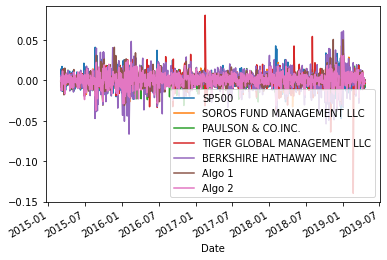

In [88]:
# Plot daily returns of all portfolios
combined_returns.plot()

#### Calculate and Plot cumulative returns.

Index(['SP500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2'],
      dtype='object')


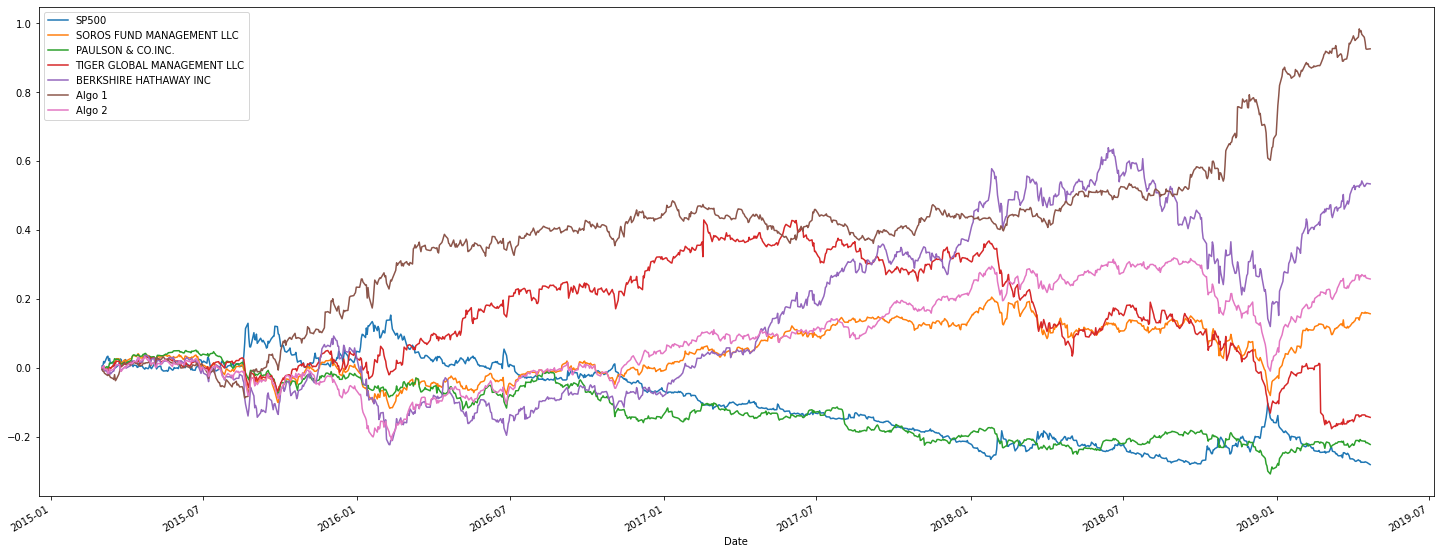

In [90]:
# Calculate cumulative returns of all portfolios
print(combined_returns.columns)
soros_cumul = (1+combined_returns.loc[:,'SOROS FUND MANAGEMENT LLC']).cumprod()-1
paulson_cumul = (1+combined_returns.loc[:,'PAULSON & CO.INC. ']).cumprod()-1
tiger_cumul = (1+combined_returns.loc[:,'TIGER GLOBAL MANAGEMENT LLC']).cumprod()-1
berkshire_cumul = (1+combined_returns.loc[:,'BERKSHIRE HATHAWAY INC']).cumprod()-1
Algo1_cumul = (1+combined_returns.loc[:,'Algo 1']).cumprod()-1
Algo2_cumul = (1+combined_returns.loc[:,'Algo 2']).cumprod()-1
sp500_cumul = (1+combined_returns.loc[:,'SP500']).cumprod()-1

# Plot cumulative returns
ax=sp500_cumul.plot(figsize=(25,10))
soros_cumul.plot(ax=ax)
paulson_cumul.plot(ax=ax)
tiger_cumul.plot(ax=ax)
berkshire_cumul.plot(ax=ax)
Algo1_cumul.plot(ax=ax)
Algo2_cumul.plot(ax=ax)

ax.legend(['SP500', 'SOROS FUND MANAGEMENT LLC','PAULSON & CO.INC. ','TIGER GLOBAL MANAGEMENT LLC','BERKSHIRE HATHAWAY INC','Algo 1','Algo 2'])


---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

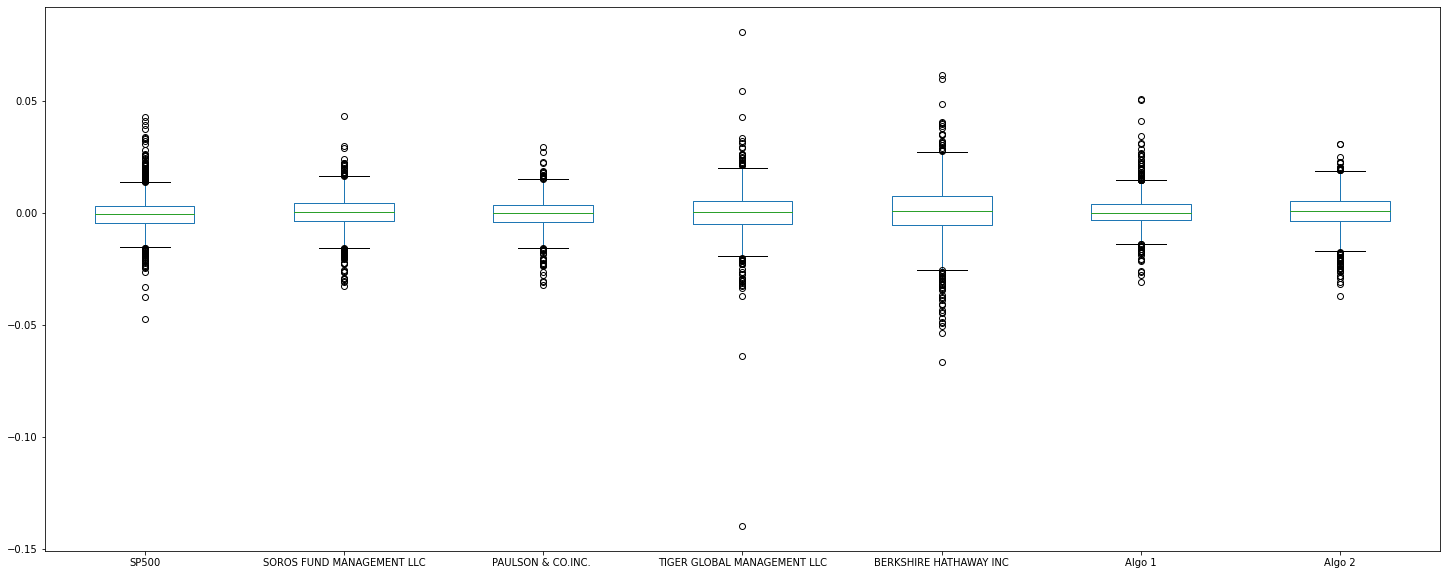

In [91]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(25,10))

### Calculate Standard Deviations

In [94]:
# Calculate the daily standard deviations of all portfolios
combined_std=combined_returns.std()
print(combined_std)

SP500                          0.008587
SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
dtype: float64


### Determine which portfolios are riskier than the S&P 500

In [96]:
# Calculate  the daily standard deviation of S&P 500
# f is a format string that facilitates concatenation
SP500_std=combined_returns.loc[:,'SP500'].std()


# Determine which portfolios are riskier than the S&P 500

first_portfolio=combined_std.loc[combined_std>SP500_std].index[0]
second_portfolio=combined_std.loc[combined_std>SP500_std].index[1]
print(f'the portfolios are {first_portfolio} and {second_portfolio}')

the portfolios are TIGER GLOBAL MANAGEMENT LLC and BERKSHIRE HATHAWAY INC


### Calculate the Annualized Standard Deviation

In [98]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std=combined_std*np.sqrt(252)
print(annualized_std)

SP500                          0.136313
SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

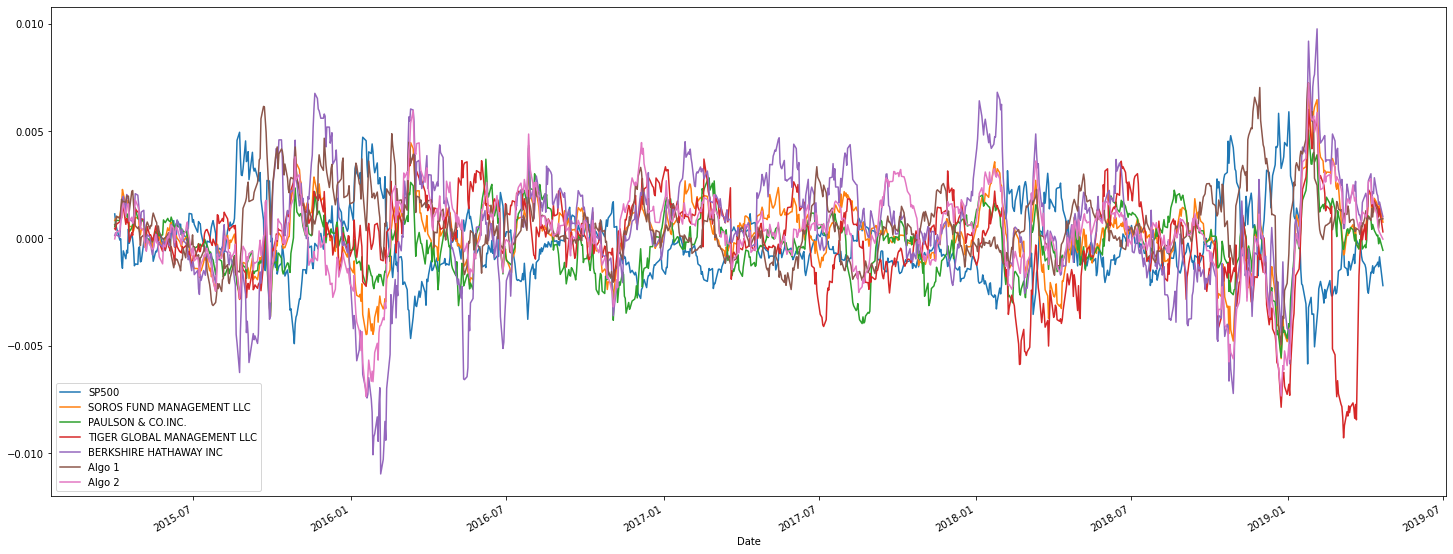

In [99]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
combined_sma_21=combined_returns.rolling(window=21).mean()

# Plot the rolling standard deviation
combined_sma_21.plot(figsize=(25,10))

### Calculate and plot the correlation

In [101]:
# Calculate the correlation
combined_corr=combined_returns.corr()

# Display de correlation matrix
combined_corr

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
SP500,1.000000,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192
SOROS FUND MANAGEMENT LLC,0.000574,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730
PAULSON & CO.INC.,0.013549,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085
TIGER GLOBAL MANAGEMENT LLC,-0.001505,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160
BERKSHIRE HATHAWAY INC,-0.013856,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756
Algo 1,-0.033963,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852
Algo 2,-0.002192,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000


the most appropriate portfolio is Paulson & CO.INC


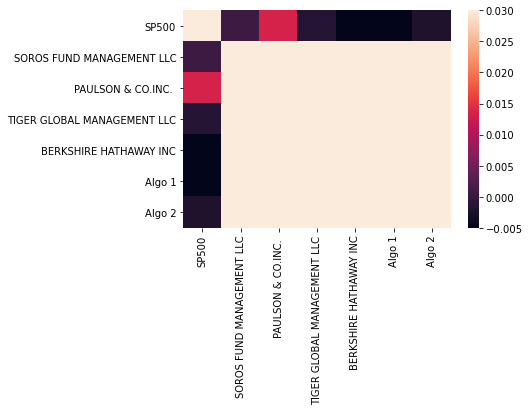

In [105]:
# Use Heatmap to get the Correlation Matrix and identify the portfolio that is most correlated to the S&P500.
import seaborn as sns
sns.heatmap(combined_corr,vmin=-.005,vmax=.03)
print(f'the most appropriate portfolio is Paulson & CO.INC')

In [108]:
combined_returns.columns

Index(['SP500', 'SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2'],
      dtype='object')

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

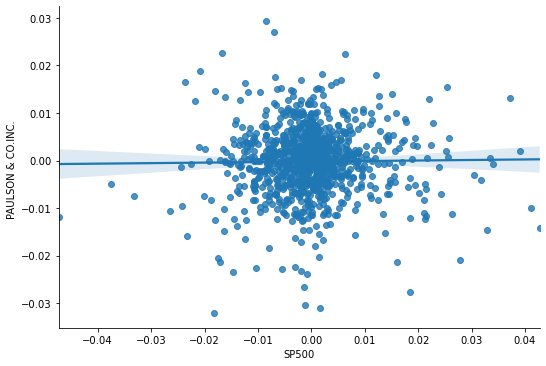

In [109]:
# Calculate covariance of a single portfolio
covariance=combined_returns['PAULSON & CO.INC. '].cov(combined_returns['SP500'])
# Calculate variance of S&P 500
variance=combined_returns['PAULSON & CO.INC. '].var()
# Computing beta
beta=covariance/variance
beta
# Plot beta trend
sns.lmplot(x='SP500',y='PAULSON & CO.INC. ',data=combined_returns,aspect=1.5,fit_reg=True)

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [143]:
# Use `ewm` to calculate the rolling window
combined_returns.ewm(halflife=21).mean()

,SP500,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2
Date,,,,,,,
2015-03-03,0.004408,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949
2015-03-04,0.001560,0.000511,-0.000802,-0.001532,-0.001089,-0.005320,0.000761
2015-03-05,0.005975,0.001718,0.000878,-0.000193,0.001603,-0.003817,0.001988
2015-03-06,0.003375,-0.000808,-0.000291,-0.002369,-0.002256,-0.004116,-0.001542
2015-03-09,0.006337,-0.000511,0.000673,-0.000616,-0.002128,-0.004400,-0.000935
...,...,...,...,...,...,...,...
2019-04-15,-0.001290,0.001439,0.000450,-0.000813,0.001896,0.001175,0.001313
2019-04-16,-0.001174,0.001480,0.000448,-0.000813,0.001862,0.000912,0.001364
2019-04-17,-0.001187,0.001338,0.000223,-0.000930,0.001906,0.000548,0.001150


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [111]:
# Annualized Sharpe Ratios
sharpe_ratios=(combined_returns.mean()*225)/(combined_std*np.sqrt(252))
print(sharpe_ratios)

SP500                         -0.463020
SOROS FUND MANAGEMENT LLC      0.306155
PAULSON & CO.INC.             -0.438770
TIGER GLOBAL MANAGEMENT LLC   -0.116238
BERKSHIRE HATHAWAY INC         0.541734
Algo 1                         1.222847
Algo 2                         0.432441
dtype: float64


<AxesSubplot:>

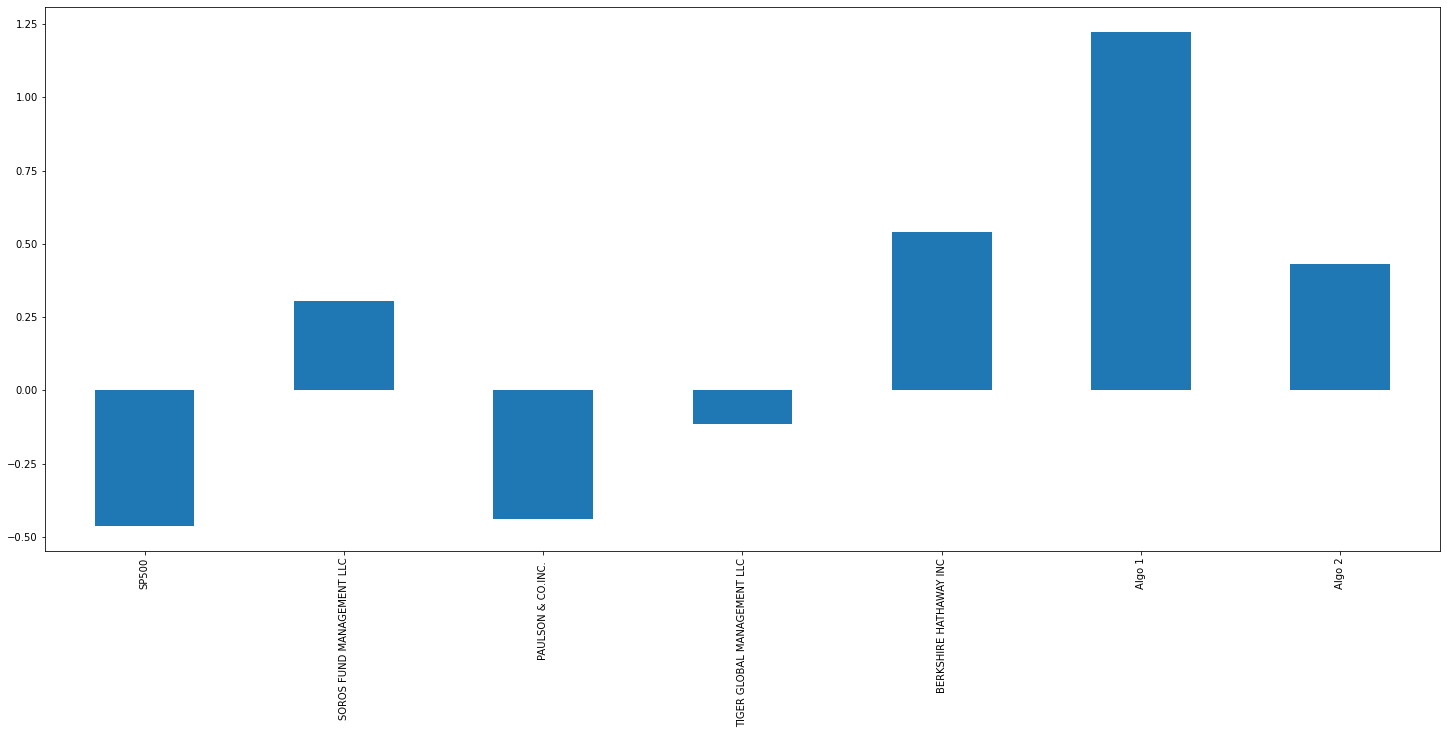

In [112]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(25,10))

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [ ]:
print(f Paulson & CO.INC.)

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [114]:
# Call in the datasets
goog_path= Path.cwd()/'Resources'/'goog_historical.csv'
aapl_path= Path.cwd()/'Resources'/'aapl_historical.csv'
cost_path= Path.cwd()/'Resources'/'cost_historical.csv'

In [116]:
# Reading data from 1st stock
goog_df=pd.read_csv(goog_path)
goog_df.head()

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40


In [117]:
# Reading data from 2nd stock
aapl_df=pd.read_csv(aapl_path)
aapl_df.head()

,Symbol,Trade DATE,NOCP
0,AAPL,5/9/2019,200.72
1,AAPL,5/8/2019,202.90
2,AAPL,5/7/2019,202.86
3,AAPL,5/6/2019,208.48
4,AAPL,5/3/2019,211.75


In [118]:
# Reading data from 3rd stock
cost_df=pd.read_csv(cost_path)
cost_df.head()

,Symbol,Trade DATE,NOCP
0,COST,5/9/2019,243.47
1,COST,5/8/2019,241.34
2,COST,5/7/2019,240.18
3,COST,5/6/2019,244.23
4,COST,5/3/2019,244.62


In [119]:
# Combine all stocks in a single DataFrame
stocks_combined=pd.concat([goog_df,aapl_df,cost_df],axis='rows',join='inner')
stocks_combined

,Symbol,Trade DATE,NOCP
0,GOOG,5/9/2019,1162.38
1,GOOG,5/8/2019,1166.27
2,GOOG,5/7/2019,1174.10
3,GOOG,5/6/2019,1189.39
4,GOOG,5/3/2019,1185.40
...,...,...,...
245,COST,5/17/2018,199.60
246,COST,5/16/2018,198.71
247,COST,5/15/2018,195.48
248,COST,5/14/2018,195.88


In [122]:
# Reset Date index
stocks_combined.set_index(pd.to_datetime(stocks_combined['Trade DATE'],infer_datetime_format=True),inplace=True)
stocks_combined.drop(columns=['Trade DATE'],inplace=True)

In [123]:
print(stocks_combined)

           Symbol     NOCP
Trade DATE                
2019-05-09   GOOG  1162.38
2019-05-08   GOOG  1166.27
2019-05-07   GOOG  1174.10
2019-05-06   GOOG  1189.39
2019-05-03   GOOG  1185.40
...           ...      ...
2018-05-17   COST   199.60
2018-05-16   COST   198.71
2018-05-15   COST   195.48
2018-05-14   COST   195.88
2018-05-11   COST   195.76

[750 rows x 2 columns]


In [127]:
# Reorganize portfolio data by having a column per symbol
pivoted_stocks=stocks_combined.pivot_table(values="NOCP",index="Trade DATE",columns="Symbol")
print(pivoted_stocks)

Symbol        AAPL    COST     GOOG
Trade DATE                         
2018-05-11  188.59  195.76  1098.26
2018-05-14  188.15  195.88  1100.20
2018-05-15  186.44  195.48  1079.23
2018-05-16  188.18  198.71  1081.77
2018-05-17  186.99  199.60  1078.59
...            ...     ...      ...
2019-05-03  211.75  244.62  1185.40
2019-05-06  208.48  244.23  1189.39
2019-05-07  202.86  240.18  1174.10
2019-05-08  202.90  241.34  1166.27
2019-05-09  200.72  243.47  1162.38

[250 rows x 3 columns]


In [128]:
# Calculate daily returns
stocks_daily_returns=pivoted_stocks.pct_change()
# Drop NAs
stocks_daily_returns.dropna(inplace=True)
# Display sample data
stocks_daily_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

<AxesSubplot:xlabel='Trade DATE'>

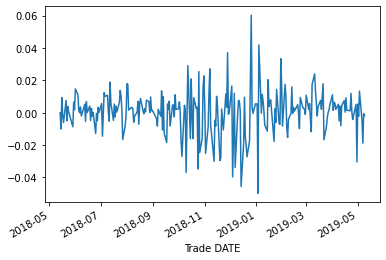

In [129]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns=stocks_daily_returns.dot(weights)
# Display sample data
portfolio_returns.plot()

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [130]:
# Join your returns DataFrame to the original returns DataFrame
stocks_daily_returns['portfolio']=portfolio_returns
stocks_daily_returns.head()

Symbol,AAPL,COST,GOOG,portfolio
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061


In [132]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
stocks_daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [133]:
# Calculate the annualized `std`
annualized_std=stocks_daily_returns.std()*np.sqrt(252)
annualized_std

Symbol
AAPL         0.296955
COST         0.209320
GOOG         0.263554
portfolio    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

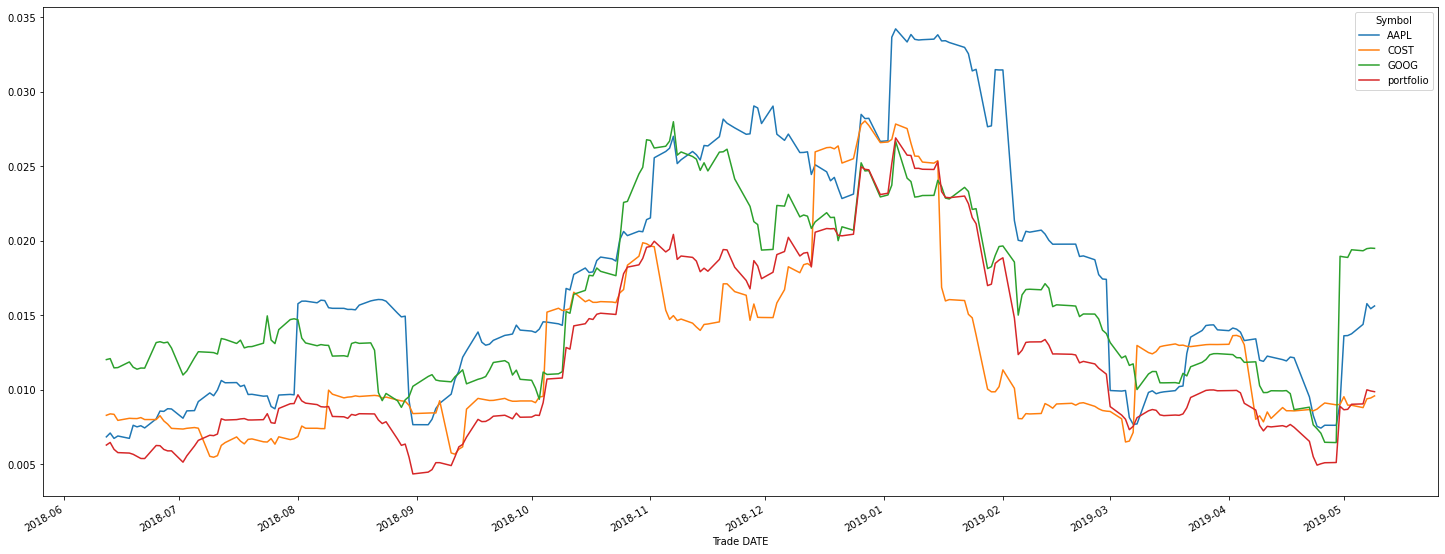

In [134]:
# Calculate rolling standard deviation
rolling_std=stocks_daily_returns.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std.plot(figsize=(25,10))

### Calculate and plot the correlation

Symbol,AAPL,COST,GOOG
Symbol,,,
AAPL,1.000000,0.575554,0.544820
COST,0.575554,1.000000,0.523334
GOOG,0.544820,0.523334,1.000000


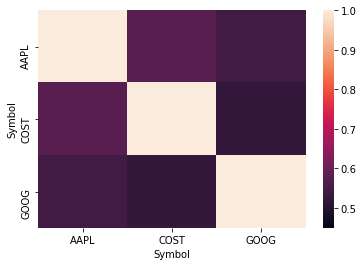

In [136]:
# Calculate and plot the correlation
stocks_corr=pivoted_stocks.corr()
sns.heatmap(stocks_corr,vmin=.45, vmax=1)
stocks_corr

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Portfolio vs. SP500'}>

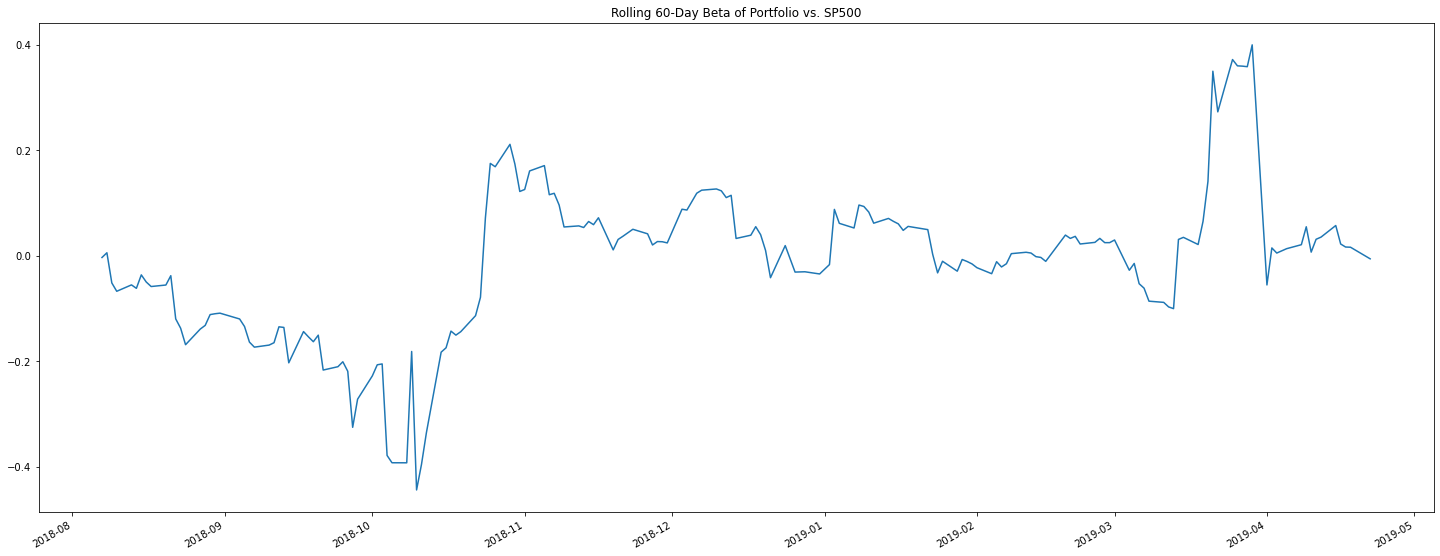

In [137]:
# Calculate and plot Beta

# Concatenate all three stock portfolios with the S&P500 Column
combined_stocks_spy=pd.concat([combined_returns['SP500'],stocks_daily_returns],axis='columns',join='inner')

# find the rolling covariance for the stock portfolios vs. the S&P500
rolling_covariance=combined_stocks_spy['portfolio'].rolling(window=60).cov(combined_stocks_spy['SP500'])
rolling_variance_spy_60=combined_stocks_spy['SP500'].rolling(window=60).var()
rolling_beta=rolling_covariance/rolling_variance_spy_60

rolling_beta.plot(figsize=(25,10), title='Rolling 60-Day Beta of Portfolio vs. SP500')

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [139]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios=(combined_stocks_spy.mean()*252)/(combined_stocks_spy.std()*np.sqrt(252))
sharpe_ratios

SP500       -0.427676
AAPL         0.440644
COST         1.203329
GOOG         0.663844
portfolio    0.876152
dtype: float64

<AxesSubplot:>

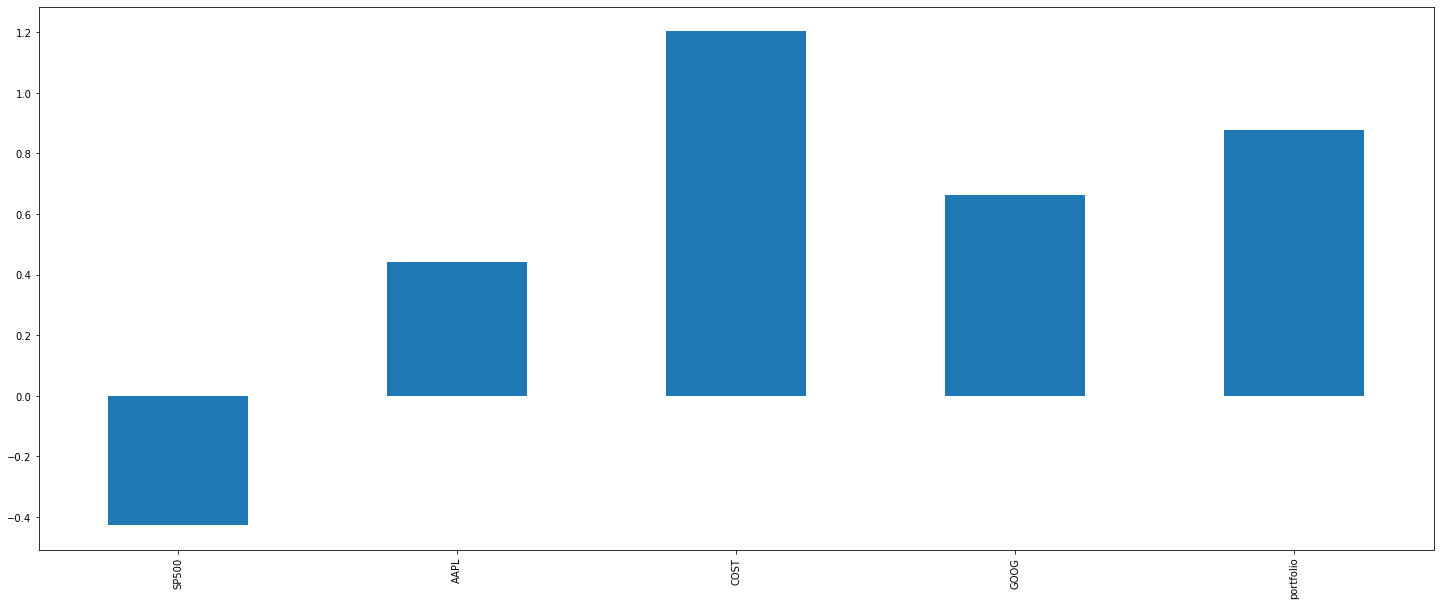

In [140]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot.bar(figsize=(25,10))

### How does your portfolio do?

Write your answer here!

In [142]:
print(f'the portfolio outperforms the S&P500 and all other stocks, except Costco. Costco outperforms the portfolio, as seen on the figure above')

the portfolio outperforms the S&P500 and all other stocks, except Costco. Costco outperforms the portfolio, as seen on the figure above
